In [2]:
import pandas as pd
import numpy as np

file_path = "AF3_FeatReduc.xlsx"
data = pd.read_excel(file_path)
y=data["Type"]
X= data.iloc[:, 2:-1]
subjects=data["Sub"]

In [5]:
from sklearn.ensemble import RandomForestClassifier
import optuna
from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score
import optuna.visualization as vis

gkf = GroupKFold(n_splits=7)  # Since there are 7 players

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameters to tune
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', [ 'sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }
    
    # Storage for fold accuracy
    accuracies = []
    
    for train_idx, test_idx in gkf.split(X, y, groups=subjects):
        print("Training on subjects:", subjects.iloc[train_idx].unique(), "Testing on subject:", subjects.iloc[test_idx].unique())

        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Create and train RandomForest model
        model = RandomForestClassifier(**param)
        model.fit(X_train, y_train)
        
        # Predict on test data
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        accuracies.append(acc)
    
    # Calculate the average accuracy across all folds
    average_accuracy = np.mean(accuracies)
    return average_accuracy

# Define the sampler and create the study
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=100)  # Modify `n_trials` as per computation resource availability

# Print best parameters
print("Best trial:")
trial = study.best_trial
print(" Accuracy: ", trial.value)
print(" Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

best_params = study.best_params
best_score = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Score for Top 50,000:", best_score)

history_plot = vis.plot_optimization_history(study)
history_plot.show()

importance_plot = vis.plot_param_importances(study)
importance_plot.show()

slice_plot = vis.plot_slice(study)
slice_plot.show()


[I 2024-05-16 17:22:33,865] A new study created in memory with name: no-name-209e6584-a0ba-4fb4-a3d8-c83a33a43640


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:22:35,966] Trial 0 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 175, 'max_depth': 29, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.9904358353510896.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:22:38,513] Trial 1 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 220, 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.9904358353510896.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:22:40,443] Trial 2 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 161, 'max_depth': 18, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.9904358353510896.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:22:42,595] Trial 3 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 191, 'max_depth': 25, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.9904358353510896.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:22:43,699] Trial 4 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 113, 'max_depth': 29, 'min_samples_split': 10, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.9904358353510896.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:22:44,768] Trial 5 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 124, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.9904358353510896.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:22:46,640] Trial 6 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 209, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.9904358353510896.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:22:47,817] Trial 7 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 117, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.9904358353510896.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:22:49,339] Trial 8 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 156, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:22:50,352] Trial 9 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 101, 'max_depth': 26, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:22:53,252] Trial 10 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 289, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:22:54,717] Trial 11 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 170, 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': False}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:22:56,164] Trial 12 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 157, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:22:57,526] Trial 13 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 147, 'max_depth': 21, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:22:59,734] Trial 14 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 240, 'max_depth': 13, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:23:01,118] Trial 15 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 145, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:23:03,422] Trial 16 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 247, 'max_depth': 12, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:23:05,186] Trial 17 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 189, 'max_depth': 19, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:23:06,512] Trial 18 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 137, 'max_depth': 23, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:23:08,037] Trial 19 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 157, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:23:10,757] Trial 20 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 293, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:23:12,073] Trial 21 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 140, 'max_depth': 21, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:23:13,722] Trial 22 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 176, 'max_depth': 22, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:23:15,113] Trial 23 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 151, 'max_depth': 26, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:23:16,389] Trial 24 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 131, 'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:23:18,150] Trial 25 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 189, 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:23:19,700] Trial 26 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 164, 'max_depth': 24, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:23:21,687] Trial 27 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 214, 'max_depth': 21, 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:23:23,080] Trial 28 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 148, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:23:24,561] Trial 29 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 177, 'max_depth': 27, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': False}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:23:25,596] Trial 30 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 103, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:23:26,820] Trial 31 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 130, 'max_depth': 13, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:23:29,090] Trial 32 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 244, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:23:31,311] Trial 33 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 236, 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:23:33,566] Trial 34 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 272, 'max_depth': 18, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': False}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:23:35,822] Trial 35 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 230, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:23:38,331] Trial 36 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 259, 'max_depth': 23, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:23:40,097] Trial 37 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 192, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:23:42,001] Trial 38 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 203, 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:23:43,454] Trial 39 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 159, 'max_depth': 22, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:23:45,479] Trial 40 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 221, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:23:46,863] Trial 41 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 145, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:23:48,023] Trial 42 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 120, 'max_depth': 18, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:23:49,610] Trial 43 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 168, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:23:51,082] Trial 44 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 155, 'max_depth': 21, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:23:52,819] Trial 45 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 177, 'max_depth': 17, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:23:53,887] Trial 46 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 110, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:23:55,084] Trial 47 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 127, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:23:56,233] Trial 48 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 136, 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': False}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:23:58,820] Trial 49 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 278, 'max_depth': 22, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:00,608] Trial 50 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 183, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:02,840] Trial 51 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 243, 'max_depth': 11, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:05,296] Trial 52 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 257, 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:07,620] Trial 53 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 256, 'max_depth': 11, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:24:09,003] Trial 54 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 147, 'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:11,148] Trial 55 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 226, 'max_depth': 9, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:12,761] Trial 56 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 164, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:24:14,064] Trial 57 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 138, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:16,002] Trial 58 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 211, 'max_depth': 24, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:17,481] Trial 59 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 154, 'max_depth': 21, 'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:19,367] Trial 60 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 201, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 10, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:21,153] Trial 61 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 192, 'max_depth': 19, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:22,736] Trial 62 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 168, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:24,121] Trial 63 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 144, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:25,814] Trial 64 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 180, 'max_depth': 23, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:27,829] Trial 65 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 240, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': False}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:30,578] Trial 66 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 300, 'max_depth': 22, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:33,082] Trial 67 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 268, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:35,470] Trial 68 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 250, 'max_depth': 16, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:36,784] Trial 69 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 133, 'max_depth': 25, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:24:38,206] Trial 70 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 159, 'max_depth': 21, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': False}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:39,394] Trial 71 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 124, 'max_depth': 27, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:24:40,766] Trial 72 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 141, 'max_depth': 22, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:24:42,303] Trial 73 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 151, 'max_depth': 23, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:44,186] Trial 74 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 186, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:46,484] Trial 75 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 232, 'max_depth': 18, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:24:47,597] Trial 76 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 110, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:49,722] Trial 77 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 218, 'max_depth': 23, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:51,367] Trial 78 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 171, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:24:52,454] Trial 79 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 118, 'max_depth': 21, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:53,949] Trial 80 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 162, 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:56,495] Trial 81 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 276, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:24:59,213] Trial 82 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 290, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:25:01,119] Trial 83 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 207, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:25:02,389] Trial 84 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 133, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:25:04,717] Trial 85 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 283, 'max_depth': 18, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': False}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:25:07,147] Trial 86 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 262, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:25:08,557] Trial 87 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 153, 'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:25:10,379] Trial 88 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 196, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:25:12,739] Trial 89 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 251, 'max_depth': 25, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:25:14,072] Trial 90 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 141, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:25:15,299] Trial 91 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 128, 'max_depth': 21, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:25:16,655] Trial 92 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 146, 'max_depth': 19, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:25:17,912] Trial 93 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 137, 'max_depth': 22, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:25:19,296] Trial 94 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 149, 'max_depth': 24, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:25:20,906] Trial 95 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 172, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:25:22,418] Trial 96 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 165, 'max_depth': 21, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:25:23,888] Trial 97 finished with value: 0.9928571428571429 and parameters: {'n_estimators': 157, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-16 17:25:25,219] Trial 98 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 141, 'max_depth': 22, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'log2', 'bootstrap': True}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-16 17:25:26,229] Trial 99 finished with value: 0.9904358353510896 and parameters: {'n_estimators': 113, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 'log2', 'bootstrap': False}. Best is trial 8 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Best trial:
 Accuracy:  0.9928571428571429
 Params: 
    n_estimators: 156
    max_depth: 19
    min_samples_split: 3
    min_samples_leaf: 9
    max_features: log2
    bootstrap: True
Best Hyperparameters: {'n_estimators': 156, 'max_depth': 19, 'min_samples_split': 3, 'min_samples_leaf': 9, 'max_features': 'log2', 'bootstrap': True}
Best Score for Top 50,000: 0.9928571428571429


In [ ]:
import lightgbm as lgb

gkf = GroupKFold(n_splits=7)  # Since there are 7 players

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameters to tune
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.2),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'num_leaves': trial.suggest_int('num_leaves', 20, 40),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 50),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'subsample_freq': trial.suggest_int('subsample_freq', 0, 7),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'max_bin': trial.suggest_int('max_bin', 200, 300),
        'force_col_wise': True,
        'verbosity': -1
    }
    
    # Storage for fold accuracy
    accuracies = []
    
    for train_idx, test_idx in gkf.split(X, y, groups=subjects):
        print("Training on subjects:", subjects.iloc[train_idx].unique(), "Testing on subject:", subjects.iloc[test_idx].unique())

        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Create and train LightGBM model
        model = lgb.LGBMClassifier(**param)
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)])
        
        # Predict on test data
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        accuracies.append(acc)
    
    # Calculate the average accuracy across all folds
    average_accuracy = np.mean(accuracies)
    return average_accuracy
sampler = optuna.samplers.TPESampler(seed=42)

# Create a study object and optimize the objective
study = optuna.create_study(direction='maximize',sampler=sampler)
study.optimize(objective, n_trials=100)  # Modify `n_trials` as per computation resource availability

# Print best parameters
print("Best trial:")
trial = study.best_trial
print(" Accuracy: ", trial.value)
print(" Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

best_params = study.best_params
best_score = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Score for Top 50,000:", best_score)

history_plot = vis.plot_optimization_history(study)
history_plot.show()

importance_plot = vis.plot_param_importances(study)
importance_plot.show()

slice_plot = vis.plot_slice(study)
slice_plot.show()

[I 2024-05-14 19:07:50,402] A new study created in memory with name: no-name-dc5ccbb3-8f58-4ef6-88e2-65a332284aaa


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:07:50,957] Trial 0 finished with value: 0.985633575464084 and parameters: {'n_estimators': 175, 'learning_rate': 0.19019214697557332, 'max_depth': 13, 'num_leaves': 32, 'min_child_samples': 16, 'subsample': 0.8311989040672406, 'subsample_freq': 0, 'colsample_bytree': 0.9464704583099741, 'reg_alpha': 0.6011150117432088, 'reg_lambda': 0.7080725777960455, 'max_bin': 202}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:07:51,540] Trial 1 finished with value: 0.985633575464084 and parameters: {'n_estimators': 294, 'learning_rate': 0.16665608551928393, 'max_depth': 7, 'num_leaves': 23, 'min_child_samples': 17, 'subsample': 0.8608484485919076, 'subsample_freq': 4, 'colsample_bytree': 0.7727780074568463, 'reg_alpha': 0.2912291401980419, 'reg_lambda': 0.6118528947223795, 'max_bin': 214}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:07:51,913] Trial 2 finished with value: 0.985633575464084 and parameters: {'n_estimators': 158, 'learning_rate': 0.07390600681544465, 'max_depth': 10, 'num_leaves': 36, 'min_child_samples': 18, 'subsample': 0.9028468876827224, 'subsample_freq': 4, 'colsample_bytree': 0.6185801650879991, 'reg_alpha': 0.6075448519014384, 'reg_lambda': 0.17052412368729153, 'max_bin': 206}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:07:52,509] Trial 3 finished with value: 0.985633575464084 and parameters: {'n_estimators': 290, 'learning_rate': 0.19316077458183734, 'max_depth': 13, 'num_leaves': 26, 'min_child_samples': 14, 'subsample': 0.9368466053024314, 'subsample_freq': 3, 'colsample_bytree': 0.6488152939379115, 'reg_alpha': 0.4951769101112702, 'reg_lambda': 0.034388521115218396, 'max_bin': 291}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:07:52,930] Trial 4 finished with value: 0.985633575464084 and parameters: {'n_estimators': 152, 'learning_rate': 0.13284193458644242, 'max_depth': 8, 'num_leaves': 30, 'min_child_samples': 32, 'subsample': 0.8369708911051055, 'subsample_freq': 7, 'colsample_bytree': 0.9100531293444458, 'reg_alpha': 0.9394989415641891, 'reg_lambda': 0.8948273504276488, 'max_bin': 260}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:07:53,606] Trial 5 finished with value: 0.985633575464084 and parameters: {'n_estimators': 285, 'learning_rate': 0.01861000790833198, 'max_depth': 7, 'num_leaves': 20, 'min_child_samples': 23, 'subsample': 0.8777354579378964, 'subsample_freq': 2, 'colsample_bytree': 0.9314950036607718, 'reg_alpha': 0.3567533266935893, 'reg_lambda': 0.28093450968738076, 'max_bin': 254}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:07:54,124] Trial 6 finished with value: 0.985633575464084 and parameters: {'n_estimators': 128, 'learning_rate': 0.1606371991700539, 'max_depth': 5, 'num_leaves': 40, 'min_child_samples': 41, 'subsample': 0.8397431363068345, 'subsample_freq': 0, 'colsample_bytree': 0.9261845713819337, 'reg_alpha': 0.7068573438476171, 'reg_lambda': 0.7290071680409873, 'max_bin': 277}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:07:54,428] Trial 7 finished with value: 0.985633575464084 and parameters: {'n_estimators': 114, 'learning_rate': 0.07233467998031025, 'max_depth': 6, 'num_leaves': 38, 'min_child_samples': 35, 'subsample': 0.8661796049705299, 'subsample_freq': 0, 'colsample_bytree': 0.7243929286862649, 'reg_alpha': 0.32518332202674705, 'reg_lambda': 0.7296061783380641, 'max_bin': 264}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:07:54,929] Trial 8 finished with value: 0.985633575464084 and parameters: {'n_estimators': 278, 'learning_rate': 0.09497077010722792, 'max_depth': 6, 'num_leaves': 34, 'min_child_samples': 41, 'subsample': 0.9122554395138993, 'subsample_freq': 6, 'colsample_bytree': 0.7975182385457563, 'reg_alpha': 0.5227328293819941, 'reg_lambda': 0.42754101835854963, 'max_bin': 202}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]


[I 2024-05-14 19:07:55,281] Trial 9 finished with value: 0.985633575464084 and parameters: {'n_estimators': 121, 'learning_rate': 0.007254407951660116, 'max_depth': 12, 'num_leaves': 26, 'min_child_samples': 30, 'subsample': 0.9815132947852186, 'subsample_freq': 1, 'colsample_bytree': 0.7641531692142519, 'reg_alpha': 0.7555511385430487, 'reg_lambda': 0.22879816549162246, 'max_bin': 207}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:07:55,891] Trial 10 finished with value: 0.985633575464084 and parameters: {'n_estimators': 211, 'learning_rate': 0.13717690756144954, 'max_depth': 15, 'num_leaves': 32, 'min_child_samples': 10, 'subsample': 0.8077450399922367, 'subsample_freq': 2, 'colsample_bytree': 0.990455959943198, 'reg_alpha': 0.09696877974827967, 'reg_lambda': 0.9923626654603374, 'max_bin': 228}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:07:56,430] Trial 11 finished with value: 0.985633575464084 and parameters: {'n_estimators': 222, 'learning_rate': 0.19082337161050456, 'max_depth': 9, 'num_leaves': 20, 'min_child_samples': 22, 'subsample': 0.8019976014762662, 'subsample_freq': 5, 'colsample_bytree': 0.8474848589441921, 'reg_alpha': 0.10249122865832999, 'reg_lambda': 0.5925717606501665, 'max_bin': 228}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:07:56,993] Trial 12 finished with value: 0.985633575464084 and parameters: {'n_estimators': 236, 'learning_rate': 0.1581059361975735, 'max_depth': 12, 'num_leaves': 27, 'min_child_samples': 24, 'subsample': 0.8454278023301758, 'subsample_freq': 4, 'colsample_bytree': 0.699896678404012, 'reg_alpha': 0.27765455748774076, 'reg_lambda': 0.5409608632634769, 'max_bin': 227}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:07:57,428] Trial 13 finished with value: 0.985633575464084 and parameters: {'n_estimators': 184, 'learning_rate': 0.19898985554578108, 'max_depth': 15, 'num_leaves': 23, 'min_child_samples': 49, 'subsample': 0.8730465104736118, 'subsample_freq': 3, 'colsample_bytree': 0.8486918133802431, 'reg_alpha': 0.23089735588778548, 'reg_lambda': 0.7296529617988127, 'max_bin': 218}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:07:57,911] Trial 14 finished with value: 0.985633575464084 and parameters: {'n_estimators': 248, 'learning_rate': 0.1663763656690497, 'max_depth': 11, 'num_leaves': 29, 'min_child_samples': 10, 'subsample': 0.8286137256002866, 'subsample_freq': 5, 'colsample_bytree': 0.8534865872047058, 'reg_alpha': 0.44327358372399167, 'reg_lambda': 0.4170915717975848, 'max_bin': 244}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:07:58,336] Trial 15 finished with value: 0.985633575464084 and parameters: {'n_estimators': 184, 'learning_rate': 0.12438539755027656, 'max_depth': 9, 'num_leaves': 33, 'min_child_samples': 17, 'subsample': 0.9337732279271732, 'subsample_freq': 2, 'colsample_bytree': 0.7538351829164537, 'reg_alpha': 0.9203764090478699, 'reg_lambda': 0.6089582803996045, 'max_bin': 241}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:07:58,828] Trial 16 finished with value: 0.985633575464084 and parameters: {'n_estimators': 261, 'learning_rate': 0.17104568300195833, 'max_depth': 14, 'num_leaves': 23, 'min_child_samples': 26, 'subsample': 0.8626663451144929, 'subsample_freq': 5, 'colsample_bytree': 0.9860930071516779, 'reg_alpha': 0.7155815433899493, 'reg_lambda': 0.8368801715559179, 'max_bin': 216}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:07:59,240] Trial 17 finished with value: 0.985633575464084 and parameters: {'n_estimators': 188, 'learning_rate': 0.11323096510526516, 'max_depth': 10, 'num_leaves': 23, 'min_child_samples': 16, 'subsample': 0.822484091666232, 'subsample_freq': 1, 'colsample_bytree': 0.6873064153189612, 'reg_alpha': 0.6012759699226796, 'reg_lambda': 0.44632200845003633, 'max_bin': 219}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:07:59,657] Trial 18 finished with value: 0.985633575464084 and parameters: {'n_estimators': 162, 'learning_rate': 0.1514316150243817, 'max_depth': 13, 'num_leaves': 30, 'min_child_samples': 20, 'subsample': 0.9874591096091891, 'subsample_freq': 7, 'colsample_bytree': 0.8121440847704084, 'reg_alpha': 0.17660393000485652, 'reg_lambda': 0.6572415663875775, 'max_bin': 201}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]


[I 2024-05-14 19:08:00,026] Trial 19 finished with value: 0.985633575464084 and parameters: {'n_estimators': 100, 'learning_rate': 0.03350486713312868, 'max_depth': 8, 'num_leaves': 35, 'min_child_samples': 13, 'subsample': 0.8943685355786479, 'subsample_freq': 1, 'colsample_bytree': 0.8841131847433006, 'reg_alpha': 0.02162477012080921, 'reg_lambda': 0.8624808991805707, 'max_bin': 240}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:00,575] Trial 20 finished with value: 0.985633575464084 and parameters: {'n_estimators': 202, 'learning_rate': 0.17782149299000635, 'max_depth': 5, 'num_leaves': 28, 'min_child_samples': 29, 'subsample': 0.859442072827948, 'subsample_freq': 3, 'colsample_bytree': 0.9568500023028139, 'reg_alpha': 0.4280804000246746, 'reg_lambda': 0.3169675723423519, 'max_bin': 300}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:01,008] Trial 21 finished with value: 0.985633575464084 and parameters: {'n_estimators': 158, 'learning_rate': 0.06892907943692739, 'max_depth': 10, 'num_leaves': 36, 'min_child_samples': 19, 'subsample': 0.8931105014060168, 'subsample_freq': 4, 'colsample_bytree': 0.6110935463191242, 'reg_alpha': 0.58213769054991, 'reg_lambda': 0.041589925237890096, 'max_bin': 211}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:01,435] Trial 22 finished with value: 0.985633575464084 and parameters: {'n_estimators': 146, 'learning_rate': 0.05527851260972061, 'max_depth': 11, 'num_leaves': 37, 'min_child_samples': 17, 'subsample': 0.9073881304995614, 'subsample_freq': 4, 'colsample_bytree': 0.618735525429713, 'reg_alpha': 0.8291885190386507, 'reg_lambda': 0.1979817982368836, 'max_bin': 209}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:08:01,911] Trial 23 finished with value: 0.985633575464084 and parameters: {'n_estimators': 168, 'learning_rate': 0.09290446838208541, 'max_depth': 8, 'num_leaves': 32, 'min_child_samples': 12, 'subsample': 0.9297449721200163, 'subsample_freq': 6, 'colsample_bytree': 0.6506090757484942, 'reg_alpha': 0.6301606793207284, 'reg_lambda': 0.14098605347455193, 'max_bin': 200}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:02,335] Trial 24 finished with value: 0.985633575464084 and parameters: {'n_estimators': 141, 'learning_rate': 0.044567773404404445, 'max_depth': 11, 'num_leaves': 39, 'min_child_samples': 26, 'subsample': 0.8505704692264937, 'subsample_freq': 4, 'colsample_bytree': 0.8095992844141268, 'reg_alpha': 0.4317377971044425, 'reg_lambda': 0.5106112281381627, 'max_bin': 224}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:08:02,751] Trial 25 finished with value: 0.985633575464084 and parameters: {'n_estimators': 171, 'learning_rate': 0.10962224656362968, 'max_depth': 9, 'num_leaves': 32, 'min_child_samples': 20, 'subsample': 0.8826768516464566, 'subsample_freq': 5, 'colsample_bytree': 0.7488249996468613, 'reg_alpha': 0.8137383455721934, 'reg_lambda': 0.3566955238896127, 'max_bin': 211}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:08:03,209] Trial 26 finished with value: 0.985633575464084 and parameters: {'n_estimators': 230, 'learning_rate': 0.1456116229378751, 'max_depth': 13, 'num_leaves': 35, 'min_child_samples': 15, 'subsample': 0.9493009433627604, 'subsample_freq': 3, 'colsample_bytree': 0.6736342791811429, 'reg_alpha': 0.6527903870327945, 'reg_lambda': 0.6635178209639416, 'max_bin': 234}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:08:03,633] Trial 27 finished with value: 0.985633575464084 and parameters: {'n_estimators': 202, 'learning_rate': 0.18275564192255667, 'max_depth': 7, 'num_leaves': 37, 'min_child_samples': 19, 'subsample': 0.8250587518135648, 'subsample_freq': 6, 'colsample_bytree': 0.7846757374990385, 'reg_alpha': 0.5575201221745554, 'reg_lambda': 0.7925656335611654, 'max_bin': 215}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:04,169] Trial 28 finished with value: 0.985633575464084 and parameters: {'n_estimators': 299, 'learning_rate': 0.08015105721891345, 'max_depth': 12, 'num_leaves': 25, 'min_child_samples': 26, 'subsample': 0.9622077267965979, 'subsample_freq': 2, 'colsample_bytree': 0.717273888656067, 'reg_alpha': 0.3651081710956178, 'reg_lambda': 0.11342729464673024, 'max_bin': 234}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:08:04,532] Trial 29 finished with value: 0.985633575464084 and parameters: {'n_estimators': 131, 'learning_rate': 0.1830910536623343, 'max_depth': 14, 'num_leaves': 31, 'min_child_samples': 12, 'subsample': 0.9244436321129565, 'subsample_freq': 4, 'colsample_bytree': 0.6588057518911439, 'reg_alpha': 0.4769439724377218, 'reg_lambda': 0.5538326471886973, 'max_bin': 205}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:08:05,039] Trial 30 finished with value: 0.985633575464084 and parameters: {'n_estimators': 258, 'learning_rate': 0.19839933660728643, 'max_depth': 7, 'num_leaves': 34, 'min_child_samples': 15, 'subsample': 0.8856346912430116, 'subsample_freq': 3, 'colsample_bytree': 0.8307852666592941, 'reg_alpha': 0.6758920920960086, 'reg_lambda': 0.0026679612772813055, 'max_bin': 271}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:05,520] Trial 31 finished with value: 0.985633575464084 and parameters: {'n_estimators': 281, 'learning_rate': 0.12773288470329403, 'max_depth': 14, 'num_leaves': 25, 'min_child_samples': 14, 'subsample': 0.950135953123147, 'subsample_freq': 3, 'colsample_bytree': 0.6346067762476311, 'reg_alpha': 0.5173983716741665, 'reg_lambda': 0.1075185512706883, 'max_bin': 299}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:08:06,071] Trial 32 finished with value: 0.985633575464084 and parameters: {'n_estimators': 300, 'learning_rate': 0.1746351607473693, 'max_depth': 13, 'num_leaves': 21, 'min_child_samples': 22, 'subsample': 0.9036419931845586, 'subsample_freq': 0, 'colsample_bytree': 0.6016276929675652, 'reg_alpha': 0.3888895473223547, 'reg_lambda': 0.046272089222025, 'max_bin': 281}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:08:06,577] Trial 33 finished with value: 0.985633575464084 and parameters: {'n_estimators': 266, 'learning_rate': 0.14035420942765772, 'max_depth': 12, 'num_leaves': 28, 'min_child_samples': 18, 'subsample': 0.9140499213634083, 'subsample_freq': 5, 'colsample_bytree': 0.8992599935893004, 'reg_alpha': 0.792020842609693, 'reg_lambda': 0.2043502949359169, 'max_bin': 291}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:07,020] Trial 34 finished with value: 0.985633575464084 and parameters: {'n_estimators': 287, 'learning_rate': 0.1884104082353165, 'max_depth': 11, 'num_leaves': 22, 'min_child_samples': 34, 'subsample': 0.9432632734154297, 'subsample_freq': 1, 'colsample_bytree': 0.6442675283348648, 'reg_alpha': 0.9974460120224868, 'reg_lambda': 0.9455277694398375, 'max_bin': 258}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:08:07,438] Trial 35 finished with value: 0.985633575464084 and parameters: {'n_estimators': 179, 'learning_rate': 0.1622286705448128, 'max_depth': 6, 'num_leaves': 25, 'min_child_samples': 22, 'subsample': 0.9675530064146617, 'subsample_freq': 0, 'colsample_bytree': 0.7284722744031821, 'reg_alpha': 0.3057065809127972, 'reg_lambda': 0.26797135979849923, 'max_bin': 252}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:07,987] Trial 36 finished with value: 0.985633575464084 and parameters: {'n_estimators': 273, 'learning_rate': 0.0808230577607756, 'max_depth': 13, 'num_leaves': 40, 'min_child_samples': 38, 'subsample': 0.8534476367027968, 'subsample_freq': 7, 'colsample_bytree': 0.9372059254842907, 'reg_alpha': 0.535865539666439, 'reg_lambda': 0.7890170132010703, 'max_bin': 286}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:08,449] Trial 37 finished with value: 0.985633575464084 and parameters: {'n_estimators': 151, 'learning_rate': 0.05714486285191288, 'max_depth': 10, 'num_leaves': 26, 'min_child_samples': 10, 'subsample': 0.8382881182636613, 'subsample_freq': 2, 'colsample_bytree': 0.6769676199265374, 'reg_alpha': 0.7221978586406994, 'reg_lambda': 0.7041747106474086, 'max_bin': 207}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:08,962] Trial 38 finished with value: 0.985633575464084 and parameters: {'n_estimators': 216, 'learning_rate': 0.15349786453432257, 'max_depth': 5, 'num_leaves': 29, 'min_child_samples': 13, 'subsample': 0.8127748576113502, 'subsample_freq': 4, 'colsample_bytree': 0.7813674791440867, 'reg_alpha': 0.4869054711050941, 'reg_lambda': 0.16342952420781776, 'max_bin': 266}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:08:09,521] Trial 39 finished with value: 0.985633575464084 and parameters: {'n_estimators': 292, 'learning_rate': 0.1946375593454186, 'max_depth': 15, 'num_leaves': 24, 'min_child_samples': 24, 'subsample': 0.8742093048119456, 'subsample_freq': 6, 'colsample_bytree': 0.8776386393812128, 'reg_alpha': 0.2051300849408053, 'reg_lambda': 0.06123793483619254, 'max_bin': 222}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:08:09,915] Trial 40 finished with value: 0.985633575464084 and parameters: {'n_estimators': 131, 'learning_rate': 0.023096539792828746, 'max_depth': 14, 'num_leaves': 21, 'min_child_samples': 48, 'subsample': 0.9996031462949724, 'subsample_freq': 3, 'colsample_bytree': 0.7079655952444476, 'reg_alpha': 0.6212575147166335, 'reg_lambda': 0.46669362110246815, 'max_bin': 212}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:08:10,385] Trial 41 finished with value: 0.985633575464084 and parameters: {'n_estimators': 194, 'learning_rate': 0.1661025663143777, 'max_depth': 8, 'num_leaves': 30, 'min_child_samples': 34, 'subsample': 0.839694173653557, 'subsample_freq': 7, 'colsample_bytree': 0.92005993534666, 'reg_alpha': 0.8851389325044365, 'reg_lambda': 0.9095469594448591, 'max_bin': 258}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:08:10,854] Trial 42 finished with value: 0.985633575464084 and parameters: {'n_estimators': 174, 'learning_rate': 0.18669715362695372, 'max_depth': 7, 'num_leaves': 27, 'min_child_samples': 32, 'subsample': 0.8161857127605564, 'subsample_freq': 6, 'colsample_bytree': 0.961383656428021, 'reg_alpha': 0.25284397946204196, 'reg_lambda': 0.9871985846987762, 'max_bin': 275}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:11,372] Trial 43 finished with value: 0.985633575464084 and parameters: {'n_estimators': 118, 'learning_rate': 0.13230619582096556, 'max_depth': 6, 'num_leaves': 33, 'min_child_samples': 39, 'subsample': 0.801683747995933, 'subsample_freq': 2, 'colsample_bytree': 0.974738243861066, 'reg_alpha': 0.9953753695081478, 'reg_lambda': 0.7722532209525065, 'max_bin': 247}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:11,811] Trial 44 finished with value: 0.985633575464084 and parameters: {'n_estimators': 155, 'learning_rate': 0.10280976077471368, 'max_depth': 9, 'num_leaves': 31, 'min_child_samples': 29, 'subsample': 0.831924006564748, 'subsample_freq': 0, 'colsample_bytree': 0.8975143089147255, 'reg_alpha': 0.15775101943661962, 'reg_lambda': 0.5946898558809692, 'max_bin': 204}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:08:12,214] Trial 45 finished with value: 0.985633575464084 and parameters: {'n_estimators': 140, 'learning_rate': 0.12116971487405383, 'max_depth': 8, 'num_leaves': 38, 'min_child_samples': 44, 'subsample': 0.8687826923884484, 'subsample_freq': 5, 'colsample_bytree': 0.9414999609753467, 'reg_alpha': 0.6791955366124687, 'reg_lambda': 0.640368355402584, 'max_bin': 293}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:08:12,622] Trial 46 finished with value: 0.985633575464084 and parameters: {'n_estimators': 163, 'learning_rate': 0.15906602954163526, 'max_depth': 9, 'num_leaves': 27, 'min_child_samples': 16, 'subsample': 0.9174629526325218, 'subsample_freq': 5, 'colsample_bytree': 0.6247736408480163, 'reg_alpha': 0.7551779088577896, 'reg_lambda': 0.7372692501701102, 'max_bin': 234}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:08:13,152] Trial 47 finished with value: 0.985633575464084 and parameters: {'n_estimators': 235, 'learning_rate': 0.14663912679484817, 'max_depth': 10, 'num_leaves': 34, 'min_child_samples': 11, 'subsample': 0.8542172252306856, 'subsample_freq': 7, 'colsample_bytree': 0.8658614071610682, 'reg_alpha': 0.3117959836600924, 'reg_lambda': 0.4044855608799327, 'max_bin': 269}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:08:13,693] Trial 48 finished with value: 0.985633575464084 and parameters: {'n_estimators': 270, 'learning_rate': 0.17633345707669157, 'max_depth': 12, 'num_leaves': 24, 'min_child_samples': 31, 'subsample': 0.8325002803329311, 'subsample_freq': 1, 'colsample_bytree': 0.9204010502307981, 'reg_alpha': 0.08996709621839616, 'reg_lambda': 0.8776346312633897, 'max_bin': 260}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:08:14,204] Trial 49 finished with value: 0.985633575464084 and parameters: {'n_estimators': 252, 'learning_rate': 0.16858315743914393, 'max_depth': 8, 'num_leaves': 29, 'min_child_samples': 27, 'subsample': 0.8190543029730347, 'subsample_freq': 4, 'colsample_bytree': 0.8357037802220342, 'reg_alpha': 0.9169131200108027, 'reg_lambda': 0.5489356345298817, 'max_bin': 219}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:14,672] Trial 50 finished with value: 0.985633575464084 and parameters: {'n_estimators': 194, 'learning_rate': 0.0953736825871279, 'max_depth': 6, 'num_leaves': 31, 'min_child_samples': 21, 'subsample': 0.8446575082487192, 'subsample_freq': 1, 'colsample_bytree': 0.6670572798694177, 'reg_alpha': 0.39854032186498056, 'reg_lambda': 0.36628601503059965, 'max_bin': 281}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:08:15,406] Trial 51 finished with value: 0.985633575464084 and parameters: {'n_estimators': 285, 'learning_rate': 0.005094229955669202, 'max_depth': 7, 'num_leaves': 21, 'min_child_samples': 24, 'subsample': 0.8741188633956151, 'subsample_freq': 2, 'colsample_bytree': 0.9916648714039666, 'reg_alpha': 0.35446694757919367, 'reg_lambda': 0.28579536931363436, 'max_bin': 252}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:08:16,092] Trial 52 finished with value: 0.985633575464084 and parameters: {'n_estimators': 291, 'learning_rate': 0.015245882360857135, 'max_depth': 7, 'num_leaves': 20, 'min_child_samples': 17, 'subsample': 0.8828154352898072, 'subsample_freq': 3, 'colsample_bytree': 0.9102604445907678, 'reg_alpha': 0.555713746282575, 'reg_lambda': 0.09091607059964138, 'max_bin': 262}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:08:16,736] Trial 53 finished with value: 0.985633575464084 and parameters: {'n_estimators': 277, 'learning_rate': 0.029803300982040468, 'max_depth': 6, 'num_leaves': 23, 'min_child_samples': 15, 'subsample': 0.8603479044262541, 'subsample_freq': 2, 'colsample_bytree': 0.9482516690354028, 'reg_alpha': 0.26615515082431507, 'reg_lambda': 0.17542935364847645, 'max_bin': 200}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:17,453] Trial 54 finished with value: 0.985633575464084 and parameters: {'n_estimators': 246, 'learning_rate': 0.19258129793893516, 'max_depth': 11, 'num_leaves': 22, 'min_child_samples': 18, 'subsample': 0.895540265247565, 'subsample_freq': 0, 'colsample_bytree': 0.9762258440119681, 'reg_alpha': 0.45356572728796296, 'reg_lambda': 0.2405893794761062, 'max_bin': 254}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:08:17,946] Trial 55 finished with value: 0.985633575464084 and parameters: {'n_estimators': 181, 'learning_rate': 0.04259665860198408, 'max_depth': 8, 'num_leaves': 22, 'min_child_samples': 20, 'subsample': 0.8669993799660746, 'subsample_freq': 3, 'colsample_bytree': 0.9327145199920073, 'reg_alpha': 0.5854749240827023, 'reg_lambda': 0.48946360929467936, 'max_bin': 241}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:18,372] Trial 56 finished with value: 0.985633575464084 and parameters: {'n_estimators': 145, 'learning_rate': 0.06591475344041281, 'max_depth': 15, 'num_leaves': 36, 'min_child_samples': 23, 'subsample': 0.8487334795603176, 'subsample_freq': 4, 'colsample_bytree': 0.7432184702533468, 'reg_alpha': 0.33441945369057785, 'reg_lambda': 0.008566103285826611, 'max_bin': 247}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:08:18,763] Trial 57 finished with value: 0.985633575464084 and parameters: {'n_estimators': 101, 'learning_rate': 0.11865967264656012, 'max_depth': 7, 'num_leaves': 20, 'min_child_samples': 13, 'subsample': 0.8852276158978467, 'subsample_freq': 2, 'colsample_bytree': 0.6940537566330541, 'reg_alpha': 0.38876816701382655, 'reg_lambda': 0.8243629598746848, 'max_bin': 213}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:08:19,195] Trial 58 finished with value: 0.985633575464084 and parameters: {'n_estimators': 164, 'learning_rate': 0.17793434756510063, 'max_depth': 9, 'num_leaves': 24, 'min_child_samples': 36, 'subsample': 0.8585866201603191, 'subsample_freq': 1, 'colsample_bytree': 0.9979933495038062, 'reg_alpha': 0.4978003528350098, 'reg_lambda': 0.6760696773255255, 'max_bin': 207}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:19,654] Trial 59 finished with value: 0.985633575464084 and parameters: {'n_estimators': 209, 'learning_rate': 0.07828223719142219, 'max_depth': 5, 'num_leaves': 26, 'min_child_samples': 19, 'subsample': 0.9373725863629777, 'subsample_freq': 3, 'colsample_bytree': 0.6005223209185396, 'reg_alpha': 0.8527249481888372, 'reg_lambda': 0.6180575489590514, 'max_bin': 230}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:08:20,053] Trial 60 finished with value: 0.985633575464084 and parameters: {'n_estimators': 137, 'learning_rate': 0.19873986453630013, 'max_depth': 13, 'num_leaves': 28, 'min_child_samples': 17, 'subsample': 0.8095245595834965, 'subsample_freq': 4, 'colsample_bytree': 0.9668985527941816, 'reg_alpha': 0.13375315468733018, 'reg_lambda': 0.12862769085070253, 'max_bin': 224}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:08:20,473] Trial 61 finished with value: 0.985633575464084 and parameters: {'n_estimators': 127, 'learning_rate': 0.13511201043636734, 'max_depth': 12, 'num_leaves': 40, 'min_child_samples': 42, 'subsample': 0.8409417004194825, 'subsample_freq': 0, 'colsample_bytree': 0.8832357938388047, 'reg_alpha': 0.7164864608228263, 'reg_lambda': 0.74451019125588, 'max_bin': 277}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]


[I 2024-05-14 19:08:20,845] Trial 62 finished with value: 0.985633575464084 and parameters: {'n_estimators': 110, 'learning_rate': 0.15557781499356818, 'max_depth': 5, 'num_leaves': 38, 'min_child_samples': 44, 'subsample': 0.8284929255505419, 'subsample_freq': 0, 'colsample_bytree': 0.8630270223971227, 'reg_alpha': 0.6442650520946036, 'reg_lambda': 0.6993643105995849, 'max_bin': 294}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:21,262] Trial 63 finished with value: 0.985633575464084 and parameters: {'n_estimators': 150, 'learning_rate': 0.18319948093735341, 'max_depth': 10, 'num_leaves': 33, 'min_child_samples': 27, 'subsample': 0.9006327170176606, 'subsample_freq': 0, 'colsample_bytree': 0.9034172346697233, 'reg_alpha': 0.588824917115434, 'reg_lambda': 0.8120975563926731, 'max_bin': 287}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:08:22,131] Trial 64 finished with value: 0.985633575464084 and parameters: {'n_estimators': 294, 'learning_rate': 0.14375650288513525, 'max_depth': 7, 'num_leaves': 39, 'min_child_samples': 15, 'subsample': 0.922155541670449, 'subsample_freq': 1, 'colsample_bytree': 0.7676839337831549, 'reg_alpha': 0.6763690074660899, 'reg_lambda': 0.866935669630105, 'max_bin': 273}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:22,578] Trial 65 finished with value: 0.985633575464084 and parameters: {'n_estimators': 174, 'learning_rate': 0.17075784418197132, 'max_depth': 6, 'num_leaves': 37, 'min_child_samples': 14, 'subsample': 0.878168958058042, 'subsample_freq': 1, 'colsample_bytree': 0.9290927440425186, 'reg_alpha': 0.7684928980465229, 'reg_lambda': 0.5720356245773156, 'max_bin': 264}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:08:22,987] Trial 66 finished with value: 0.985633575464084 and parameters: {'n_estimators': 159, 'learning_rate': 0.16420128763318478, 'max_depth': 8, 'num_leaves': 35, 'min_child_samples': 21, 'subsample': 0.824495736585182, 'subsample_freq': 5, 'colsample_bytree': 0.6352845499683623, 'reg_alpha': 0.5298462574446962, 'reg_lambda': 0.31434716929363427, 'max_bin': 203}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:08:23,520] Trial 67 finished with value: 0.985633575464084 and parameters: {'n_estimators': 279, 'learning_rate': 0.1487432292393786, 'max_depth': 14, 'num_leaves': 36, 'min_child_samples': 47, 'subsample': 0.8906199307473974, 'subsample_freq': 4, 'colsample_bytree': 0.9513899679637925, 'reg_alpha': 0.444265497360163, 'reg_lambda': 0.689883213151026, 'max_bin': 268}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:08:23,902] Trial 68 finished with value: 0.985633575464084 and parameters: {'n_estimators': 126, 'learning_rate': 0.08661352138635153, 'max_depth': 5, 'num_leaves': 32, 'min_child_samples': 12, 'subsample': 0.8653285112624662, 'subsample_freq': 6, 'colsample_bytree': 0.8143829946948389, 'reg_alpha': 0.22889514769125854, 'reg_lambda': 0.6446519322918082, 'max_bin': 280}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:08:24,343] Trial 69 finished with value: 0.985633575464084 and parameters: {'n_estimators': 190, 'learning_rate': 0.10477501157669927, 'max_depth': 9, 'num_leaves': 34, 'min_child_samples': 18, 'subsample': 0.9620316757770344, 'subsample_freq': 3, 'colsample_bytree': 0.8895712469547806, 'reg_alpha': 0.9553775346322669, 'reg_lambda': 0.08049618436608467, 'max_bin': 287}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:08:25,057] Trial 70 finished with value: 0.985633575464084 and parameters: {'n_estimators': 263, 'learning_rate': 0.1908282444327589, 'max_depth': 12, 'num_leaves': 30, 'min_child_samples': 24, 'subsample': 0.8377910156108465, 'subsample_freq': 1, 'colsample_bytree': 0.6149816926887646, 'reg_alpha': 0.6082299768634638, 'reg_lambda': 0.515328656027255, 'max_bin': 256}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:08:25,430] Trial 71 finished with value: 0.985633575464084 and parameters: {'n_estimators': 115, 'learning_rate': 0.047495040766076996, 'max_depth': 6, 'num_leaves': 39, 'min_child_samples': 33, 'subsample': 0.8469540085177535, 'subsample_freq': 0, 'colsample_bytree': 0.7383534703075464, 'reg_alpha': 0.29577673101164137, 'reg_lambda': 0.763414275955718, 'max_bin': 248}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:08:25,809] Trial 72 finished with value: 0.985633575464084 and parameters: {'n_estimators': 104, 'learning_rate': 0.062264268960897935, 'max_depth': 6, 'num_leaves': 38, 'min_child_samples': 36, 'subsample': 0.8567721374260362, 'subsample_freq': 0, 'colsample_bytree': 0.7869861854220636, 'reg_alpha': 0.3361409483763654, 'reg_lambda': 0.711853838479263, 'max_bin': 265}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]


[I 2024-05-14 19:08:26,193] Trial 73 finished with value: 0.985633575464084 and parameters: {'n_estimators': 133, 'learning_rate': 0.1802463803744846, 'max_depth': 5, 'num_leaves': 40, 'min_child_samples': 29, 'subsample': 0.9065764454363902, 'subsample_freq': 0, 'colsample_bytree': 0.7594809878942195, 'reg_alpha': 0.40308831321293814, 'reg_lambda': 0.8938916648265137, 'max_bin': 209}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:08:26,581] Trial 74 finished with value: 0.985633575464084 and parameters: {'n_estimators': 123, 'learning_rate': 0.10973222495511886, 'max_depth': 7, 'num_leaves': 38, 'min_child_samples': 38, 'subsample': 0.8695904489713127, 'subsample_freq': 2, 'colsample_bytree': 0.7181840617040749, 'reg_alpha': 0.5605344667211026, 'reg_lambda': 0.613830446690593, 'max_bin': 217}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]


[I 2024-05-14 19:08:26,959] Trial 75 finished with value: 0.985633575464084 and parameters: {'n_estimators': 114, 'learning_rate': 0.07257493846186745, 'max_depth': 13, 'num_leaves': 39, 'min_child_samples': 40, 'subsample': 0.8335749828846077, 'subsample_freq': 0, 'colsample_bytree': 0.9169766978028349, 'reg_alpha': 0.4585332171867037, 'reg_lambda': 0.7294450064526238, 'max_bin': 297}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:08:27,381] Trial 76 finished with value: 0.985633575464084 and parameters: {'n_estimators': 167, 'learning_rate': 0.12854271600427164, 'max_depth': 6, 'num_leaves': 36, 'min_child_samples': 31, 'subsample': 0.8787435280838454, 'subsample_freq': 4, 'colsample_bytree': 0.6852166832410734, 'reg_alpha': 0.24738323037359072, 'reg_lambda': 0.2272829223820949, 'max_bin': 260}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:08:27,936] Trial 77 finished with value: 0.985633575464084 and parameters: {'n_estimators': 154, 'learning_rate': 0.0894098374864056, 'max_depth': 7, 'num_leaves': 23, 'min_child_samples': 35, 'subsample': 0.8604523729227037, 'subsample_freq': 0, 'colsample_bytree': 0.6510250702005568, 'reg_alpha': 0.419436455083652, 'reg_lambda': 0.8399292415365334, 'max_bin': 238}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:28,384] Trial 78 finished with value: 0.985633575464084 and parameters: {'n_estimators': 147, 'learning_rate': 0.011349713981296826, 'max_depth': 5, 'num_leaves': 40, 'min_child_samples': 16, 'subsample': 0.8432592816238227, 'subsample_freq': 1, 'colsample_bytree': 0.7682322630457069, 'reg_alpha': 0.20321632573585466, 'reg_lambda': 0.16537440861807529, 'max_bin': 272}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:28,816] Trial 79 finished with value: 0.985633575464084 and parameters: {'n_estimators': 136, 'learning_rate': 0.05167273462354074, 'max_depth': 7, 'num_leaves': 27, 'min_child_samples': 10, 'subsample': 0.8528279907849997, 'subsample_freq': 5, 'colsample_bytree': 0.8215915092952187, 'reg_alpha': 0.5087471485797205, 'reg_lambda': 0.9612134882304407, 'max_bin': 206}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:29,411] Trial 80 finished with value: 0.985633575464084 and parameters: {'n_estimators': 300, 'learning_rate': 0.04017492196881536, 'max_depth': 11, 'num_leaves': 25, 'min_child_samples': 43, 'subsample': 0.8899494045333429, 'subsample_freq': 4, 'colsample_bytree': 0.7996931518496827, 'reg_alpha': 0.7461349520117118, 'reg_lambda': 0.793355808675313, 'max_bin': 283}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:08:29,933] Trial 81 finished with value: 0.985633575464084 and parameters: {'n_estimators': 287, 'learning_rate': 0.09501598683155683, 'max_depth': 6, 'num_leaves': 33, 'min_child_samples': 40, 'subsample': 0.9143618382057022, 'subsample_freq': 7, 'colsample_bytree': 0.6260993998344551, 'reg_alpha': 0.6503254146307704, 'reg_lambda': 0.4250431516809325, 'max_bin': 201}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:08:30,480] Trial 82 finished with value: 0.985633575464084 and parameters: {'n_estimators': 294, 'learning_rate': 0.0722665742743509, 'max_depth': 6, 'num_leaves': 35, 'min_child_samples': 46, 'subsample': 0.9305517304305377, 'subsample_freq': 6, 'colsample_bytree': 0.7323414595658756, 'reg_alpha': 0.29038420212903004, 'reg_lambda': 0.37282134789636046, 'max_bin': 203}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:08:31,005] Trial 83 finished with value: 0.985633575464084 and parameters: {'n_estimators': 284, 'learning_rate': 0.1609987621333833, 'max_depth': 6, 'num_leaves': 37, 'min_child_samples': 41, 'subsample': 0.9105150329984181, 'subsample_freq': 7, 'colsample_bytree': 0.7907217247834583, 'reg_alpha': 0.5528763669623674, 'reg_lambda': 0.32875346883731715, 'max_bin': 214}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:08:31,550] Trial 84 finished with value: 0.985633575464084 and parameters: {'n_estimators': 271, 'learning_rate': 0.14014390620188652, 'max_depth': 8, 'num_leaves': 34, 'min_child_samples': 38, 'subsample': 0.899823848325228, 'subsample_freq': 6, 'colsample_bytree': 0.8376816515651339, 'reg_alpha': 0.4728393531330103, 'reg_lambda': 0.27489704921304176, 'max_bin': 209}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:08:32,072] Trial 85 finished with value: 0.985633575464084 and parameters: {'n_estimators': 275, 'learning_rate': 0.11542668687296907, 'max_depth': 7, 'num_leaves': 32, 'min_child_samples': 45, 'subsample': 0.9231046567646819, 'subsample_freq': 3, 'colsample_bytree': 0.7743524742615701, 'reg_alpha': 0.7021081885021133, 'reg_lambda': 0.4570534868143921, 'max_bin': 251}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:08:32,611] Trial 86 finished with value: 0.985633575464084 and parameters: {'n_estimators': 290, 'learning_rate': 0.1856235244479981, 'max_depth': 5, 'num_leaves': 31, 'min_child_samples': 50, 'subsample': 0.9547136872647403, 'subsample_freq': 7, 'colsample_bytree': 0.8049143193336044, 'reg_alpha': 0.8300410910954198, 'reg_lambda': 0.5745851230445385, 'max_bin': 255}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:08:33,166] Trial 87 finished with value: 0.985633575464084 and parameters: {'n_estimators': 258, 'learning_rate': 0.08100494418759897, 'max_depth': 8, 'num_leaves': 37, 'min_child_samples': 14, 'subsample': 0.877778348989217, 'subsample_freq': 5, 'colsample_bytree': 0.7040139996738723, 'reg_alpha': 0.6188492380958557, 'reg_lambda': 0.665583991716595, 'max_bin': 210}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:33,638] Trial 88 finished with value: 0.985633575464084 and parameters: {'n_estimators': 225, 'learning_rate': 0.19550839407197113, 'max_depth': 12, 'num_leaves': 21, 'min_child_samples': 36, 'subsample': 0.8966244273953153, 'subsample_freq': 6, 'colsample_bytree': 0.7531207340057657, 'reg_alpha': 0.36653323639461277, 'reg_lambda': 0.2153715037479833, 'max_bin': 290}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:08:34,023] Trial 89 finished with value: 0.985633575464084 and parameters: {'n_estimators': 107, 'learning_rate': 0.0016663899977134855, 'max_depth': 13, 'num_leaves': 33, 'min_child_samples': 33, 'subsample': 0.9422747970564842, 'subsample_freq': 4, 'colsample_bytree': 0.6621810122578682, 'reg_alpha': 0.48646032145015267, 'reg_lambda': 0.5264942964622724, 'max_bin': 269}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:08:34,513] Trial 90 finished with value: 0.985633575464084 and parameters: {'n_estimators': 281, 'learning_rate': 0.1737334217531984, 'max_depth': 6, 'num_leaves': 35, 'min_child_samples': 30, 'subsample': 0.9749621823108052, 'subsample_freq': 0, 'colsample_bytree': 0.9294459648985555, 'reg_alpha': 0.32879275091088067, 'reg_lambda': 0.03552846748390735, 'max_bin': 277}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:35,024] Trial 91 finished with value: 0.985633575464084 and parameters: {'n_estimators': 121, 'learning_rate': 0.024761282773989597, 'max_depth': 14, 'num_leaves': 29, 'min_child_samples': 16, 'subsample': 0.8353166043508577, 'subsample_freq': 1, 'colsample_bytree': 0.7947047774138499, 'reg_alpha': 0.6908175641520735, 'reg_lambda': 0.24550029599990308, 'max_bin': 205}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:35,444] Trial 92 finished with value: 0.985633575464084 and parameters: {'n_estimators': 139, 'learning_rate': 0.009759799870043365, 'max_depth': 13, 'num_leaves': 26, 'min_child_samples': 28, 'subsample': 0.9971243237025861, 'subsample_freq': 1, 'colsample_bytree': 0.94132391170025, 'reg_alpha': 0.8843031571934468, 'reg_lambda': 0.19164621248807176, 'max_bin': 203}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:36,010] Trial 93 finished with value: 0.985633575464084 and parameters: {'n_estimators': 296, 'learning_rate': 0.0985441478461146, 'max_depth': 12, 'num_leaves': 30, 'min_child_samples': 19, 'subsample': 0.982476303577495, 'subsample_freq': 2, 'colsample_bytree': 0.7182179643749623, 'reg_alpha': 0.7907869317310803, 'reg_lambda': 0.13718594948826857, 'max_bin': 200}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:36,465] Trial 94 finished with value: 0.985633575464084 and parameters: {'n_estimators': 143, 'learning_rate': 0.018310113584728064, 'max_depth': 10, 'num_leaves': 22, 'min_child_samples': 25, 'subsample': 0.827119942627965, 'subsample_freq': 2, 'colsample_bytree': 0.778710337456125, 'reg_alpha': 0.6327497603068377, 'reg_lambda': 0.9227970145632473, 'max_bin': 207}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]


[I 2024-05-14 19:08:36,947] Trial 95 finished with value: 0.985633575464084 and parameters: {'n_estimators': 113, 'learning_rate': 0.036247104883102794, 'max_depth': 13, 'num_leaves': 24, 'min_child_samples': 37, 'subsample': 0.8486938411950613, 'subsample_freq': 0, 'colsample_bytree': 0.8248305628873892, 'reg_alpha': 0.5325113887953048, 'reg_lambda': 0.39803759093766317, 'max_bin': 245}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:37,359] Trial 96 finished with value: 0.985633575464084 and parameters: {'n_estimators': 128, 'learning_rate': 0.0865886746789599, 'max_depth': 11, 'num_leaves': 28, 'min_child_samples': 42, 'subsample': 0.872080903089224, 'subsample_freq': 1, 'colsample_bytree': 0.9591582714933923, 'reg_alpha': 0.5638624028589687, 'reg_lambda': 0.33134110192584315, 'max_bin': 216}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]


[I 2024-05-14 19:08:37,805] Trial 97 finished with value: 0.985633575464084 and parameters: {'n_estimators': 174, 'learning_rate': 0.15462603740129788, 'max_depth': 7, 'num_leaves': 20, 'min_child_samples': 13, 'subsample': 0.822068759556713, 'subsample_freq': 0, 'colsample_bytree': 0.9808296722220559, 'reg_alpha': 0.7403990507855092, 'reg_lambda': 0.2947685134291357, 'max_bin': 212}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:08:38,214] Trial 98 finished with value: 0.985633575464084 and parameters: {'n_estimators': 119, 'learning_rate': 0.12418348800822761, 'max_depth': 14, 'num_leaves': 25, 'min_child_samples': 21, 'subsample': 0.8154342282751132, 'subsample_freq': 3, 'colsample_bytree': 0.8503551675034106, 'reg_alpha': 0.6649709571056694, 'reg_lambda': 0.26106719604065387, 'max_bin': 220}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:08:38,674] Trial 99 finished with value: 0.985633575464084 and parameters: {'n_estimators': 159, 'learning_rate': 0.10539881230011489, 'max_depth': 5, 'num_leaves': 36, 'min_child_samples': 34, 'subsample': 0.9183390232151429, 'subsample_freq': 2, 'colsample_bytree': 0.7585860961570453, 'reg_alpha': 0.5999448477485357, 'reg_lambda': 0.6342675913202305, 'max_bin': 208}. Best is trial 0 with value: 0.985633575464084.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Best trial:
 Accuracy:  0.985633575464084
 Params: 
    n_estimators: 175
    learning_rate: 0.19019214697557332
    max_depth: 13
    num_leaves: 32
    min_child_samples: 16
    subsample: 0.8311989040672406
    subsample_freq: 0
    colsample_bytree: 0.9464704583099741
    reg_alpha: 0.6011150117432088
    reg_lambda: 0.7080725777960455
    max_bin: 202
Best Hyperparameters: {'n_estimators': 175, 'learning_rate': 0.19019214697557332, 'max_depth': 13, 'num_leaves': 32, 'min_child_samples': 16, 'subsample': 0.8311989040672406, 'subsample_freq': 0, 'colsample_bytree': 0.9464704583099741, 'reg_alpha': 0.6011150117432088, 'reg_lambda': 0.7080725777960455, 'max_bin': 202}
Best Score for Top 50,000: 0.985633575464084


LightGBM is too strong for this Dataset, we switch to Decision Tree because performance may be the same but we gain a lot regaring interpretability

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GroupKFold
from sklearn.metrics import accuracy_score
import optuna

# Load the data
file_path = "AF3_FeatReduc.xlsx"
data = pd.read_excel(file_path)
y = data["Type"]
X = data.iloc[:, 1:-1]
subjects = data["Sub"]

# Define the cross-validation strategy
gkf = GroupKFold(n_splits=7)  # Since there are 7 players

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameters to tune for DecisionTreeClassifier
    param = {
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
        'max_depth': trial.suggest_int('max_depth', 1, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', [ 'sqrt', 'log2', None])
    }
    
    # Storage for fold accuracy
    accuracies = []
    
    for train_idx, test_idx in gkf.split(X, y, groups=subjects):
        print("Training on subjects:", subjects.iloc[train_idx].unique(), "Testing on subject:", subjects.iloc[test_idx].unique())
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Create and train Decision Tree model
        model = DecisionTreeClassifier(**param)
        model.fit(X_train, y_train)
        
        # Predict on test data
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        accuracies.append(acc)
    
    # Calculate the average accuracy across all folds
    average_accuracy = np.mean(accuracies)
    return average_accuracy

# Sampler with a seed for reproducibility
sampler = optuna.samplers.TPESampler(seed=42)

# Create a study object and optimize the objective
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=100)  # Modify `n_trials` as per computation resource availability

# Print best parameters
print("Best trial:")
trial = study.best_trial
print(" Accuracy: ", trial.value)
print(" Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")



best_params = study.best_params
best_score = study.best_value

print("Best Hyperparameters:", best_params)
print("Best Score for Top 50,000:", best_score)

history_plot = vis.plot_optimization_history(study)
history_plot.show()

importance_plot = vis.plot_param_importances(study)
importance_plot.show()

slice_plot = vis.plot_slice(study)
slice_plot.show()

[I 2024-05-14 19:14:36,481] A new study created in memory with name: no-name-5cad7fea-ccbc-4353-8ccd-dc19f28297dd
[I 2024-05-14 19:14:36,557] Trial 0 finished with value: 0.947497982243745 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.947497982243745.
[I 2024-05-14 19:14:36,629] Trial 1 finished with value: 0.9880145278450364 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9880145278450364.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Test

[I 2024-05-14 19:14:36,697] Trial 2 finished with value: 0.9880952380952381 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 7, 'min_samples_split': 16, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 2 with value: 0.9880952380952381.
[I 2024-05-14 19:14:36,771] Trial 3 finished with value: 0.9641646489104116 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 15, 'min_samples_split': 17, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 2 with value: 0.9880952380952381.
[I 2024-05-14 19:14:36,826] Trial 4 finished with value: 0.9642857142857143 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 4, 'min_samples_split': 14, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 2 with value: 0.9880952380952381.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Test

[I 2024-05-14 19:14:36,919] Trial 5 finished with value: 0.9904358353510896 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 9, 'min_samples_split': 19, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 5 with value: 0.9904358353510896.
[I 2024-05-14 19:14:37,028] Trial 6 finished with value: 0.9904358353510896 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 5 with value: 0.9904358353510896.
[I 2024-05-14 19:14:37,095] Trial 7 finished with value: 0.9190476190476191 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 11, 'min_samples_split': 15, 'min_samples_leaf': 16, 'max_features': 'log2'}. Best is trial 5 with value: 0.9904358353510896.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Test

[I 2024-05-14 19:14:37,153] Trial 8 finished with value: 0.9904761904761905 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 15, 'max_features': 'log2'}. Best is trial 8 with value: 0.9904761904761905.
[I 2024-05-14 19:14:37,327] Trial 9 finished with value: 0.992816787732042 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 12, 'min_samples_split': 11, 'min_samples_leaf': 11, 'max_features': 'sqrt'}. Best is trial 9 with value: 0.992816787732042.


Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:37,437] Trial 10 finished with value: 0.992816787732042 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 20, 'max_features': 'sqrt'}. Best is trial 9 with value: 0.992816787732042.
[I 2024-05-14 19:14:37,559] Trial 11 finished with value: 0.9928571428571429 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 20, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:37,647] Trial 12 finished with value: 0.9904358353510896 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 13, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.9928571428571429.
[I 2024-05-14 19:14:37,765] Trial 13 finished with value: 0.9928571428571429 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 20, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:37,877] Trial 14 finished with value: 0.980952380952381 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 20, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.9928571428571429.
[I 2024-05-14 19:14:37,963] Trial 15 finished with value: 0.9928571428571429 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 13, 'min_samples_split': 7, 'min_samples_leaf': 17, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:38,086] Trial 16 finished with value: 0.9904761904761905 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 18, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:14:38,227] Trial 17 finished with value: 0.9879741727199355 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 14, 'max_features': None}. Best is trial 11 with value: 0.9928571428571429.
[I 2024-05-14 19:14:38,322] Trial 18 finished with value: 0.9547619047619047 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 13, 'min_samples_split': 13, 'min_samples_leaf': 18, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.9928571428571429.
[I 2024-05-14 19:14:38,412] Trial 19 finished with value: 0.9808716707021793 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 1, 'min_samples_split': 4, 'min_samples_leaf': 12, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.9928571428571429.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:38,556] Trial 20 finished with value: 0.9808716707021793 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_features': None}. Best is trial 11 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:38,656] Trial 21 finished with value: 0.9356335754640839 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 13, 'min_samples_split': 7, 'min_samples_leaf': 17, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.9928571428571429.
[I 2024-05-14 19:14:38,762] Trial 22 finished with value: 0.9832526230831317 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 20, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.9928571428571429.
[I 2024-05-14 19:14:38,873] Trial 23 finished with value: 0.9904358353510896 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 18, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:38,972] Trial 24 finished with value: 0.9903954802259888 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 16, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.9928571428571429.
[I 2024-05-14 19:14:39,071] Trial 25 finished with value: 0.9904358353510896 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 19, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]


[I 2024-05-14 19:14:39,175] Trial 26 finished with value: 0.9904358353510896 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 17, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.9928571428571429.
[I 2024-05-14 19:14:39,275] Trial 27 finished with value: 0.9500000000000001 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 15, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.9928571428571429.


Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]


[I 2024-05-14 19:14:39,413] Trial 28 finished with value: 0.98091202582728 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 19, 'max_features': None}. Best is trial 11 with value: 0.9928571428571429.
[I 2024-05-14 19:14:39,513] Trial 29 finished with value: 0.9855932203389831 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 11, 'min_samples_split': 12, 'min_samples_leaf': 20, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.9928571428571429.


Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]


[I 2024-05-14 19:14:39,607] Trial 30 finished with value: 0.9832929782082325 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 17, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.9928571428571429.
[I 2024-05-14 19:14:39,712] Trial 31 finished with value: 0.9880145278450364 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 12, 'min_samples_split': 11, 'min_samples_leaf': 11, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.9928571428571429.


Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]


[I 2024-05-14 19:14:39,812] Trial 32 finished with value: 0.9880145278450364 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.9928571428571429.
[I 2024-05-14 19:14:39,915] Trial 33 finished with value: 0.9665859564164648 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.9928571428571429.


Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]


[I 2024-05-14 19:14:40,034] Trial 34 finished with value: 0.9808716707021793 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 14, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.9928571428571429.
[I 2024-05-14 19:14:40,117] Trial 35 finished with value: 0.9046811945117029 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 13, 'max_features': 'log2'}. Best is trial 11 with value: 0.9928571428571429.


Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Test

[I 2024-05-14 19:14:40,218] Trial 36 finished with value: 0.9214285714285715 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 19, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.9928571428571429.
[I 2024-05-14 19:14:40,332] Trial 37 finished with value: 0.9976190476190476 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]


[I 2024-05-14 19:14:40,459] Trial 38 finished with value: 0.9856739305891848 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 11, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:40,597] Trial 39 finished with value: 0.9904761904761905 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 9, 'min_samples_split': 17, 'min_samples_leaf': 1, 'max_features': None}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]


[I 2024-05-14 19:14:40,722] Trial 40 finished with value: 0.9714285714285714 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 13, 'min_samples_split': 14, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:40,815] Trial 41 finished with value: 0.9642453591606134 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 12, 'min_samples_split': 12, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]


[I 2024-05-14 19:14:40,901] Trial 42 finished with value: 0.9880952380952381 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 14, 'min_samples_split': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:41,013] Trial 43 finished with value: 0.992816787732042 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 16, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]


[I 2024-05-14 19:14:41,121] Trial 44 finished with value: 0.8663034705407586 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 19, 'max_features': 'log2'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:41,216] Trial 45 finished with value: 0.9666666666666667 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 11, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:14:41,326] Trial 46 finished with value: 0.9903954802259888 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 12, 'min_samples_split': 13, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:41,440] Trial 47 finished with value: 0.969047619047619 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 14, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]


[I 2024-05-14 19:14:41,600] Trial 48 finished with value: 0.9903954802259888 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 11, 'min_samples_leaf': 18, 'max_features': None}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:14:41,792] Trial 49 finished with value: 0.9232041969330105 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 15, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:41,909] Trial 50 finished with value: 0.9928571428571429 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 11, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:42,027] Trial 51 finished with value: 0.9880548829701372 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:42,122] Trial 52 finished with value: 0.985633575464084 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:42,221] Trial 53 finished with value: 0.9832526230831317 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 12, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:42,347] Trial 54 finished with value: 0.9833333333333334 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:42,443] Trial 55 finished with value: 0.9785714285714285 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:42,552] Trial 56 finished with value: 0.9904358353510896 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:42,659] Trial 57 finished with value: 0.930952380952381 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 20, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:42,752] Trial 58 finished with value: 0.9857142857142858 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 11, 'min_samples_split': 11, 'min_samples_leaf': 12, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]


[I 2024-05-14 19:14:42,933] Trial 59 finished with value: 0.9784907183212267 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:43,046] Trial 60 finished with value: 0.9761904761904763 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 12, 'min_samples_split': 14, 'min_samples_leaf': 17, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:43,150] Trial 61 finished with value: 0.9904761904761905 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 20, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:43,285] Trial 62 finished with value: 0.9475383373688459 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 19, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:43,402] Trial 63 finished with value: 0.935633575464084 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 14, 'min_samples_split': 7, 'min_samples_leaf': 20, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:43,506] Trial 64 finished with value: 0.9784907183212269 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 19, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:43,621] Trial 65 finished with value: 0.9761097659402745 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 18, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:14:43,814] Trial 66 finished with value: 0.9880145278450364 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 16, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:43,925] Trial 67 finished with value: 0.973769168684423 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 11, 'min_samples_split': 7, 'min_samples_leaf': 18, 'max_features': 'log2'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]


[I 2024-05-14 19:14:44,054] Trial 68 finished with value: 0.9880952380952381 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 13, 'min_samples_split': 13, 'min_samples_leaf': 15, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:44,162] Trial 69 finished with value: 0.985633575464084 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 20, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]


[I 2024-05-14 19:14:44,315] Trial 70 finished with value: 0.9808313155770784 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 6, 'max_features': None}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:44,419] Trial 71 finished with value: 0.9689669087974172 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 14, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:44,533] Trial 72 finished with value: 0.9404761904761905 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 16, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:44,650] Trial 73 finished with value: 0.9833333333333333 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 12, 'min_samples_split': 12, 'min_samples_leaf': 18, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:44,752] Trial 74 finished with value: 0.9928571428571429 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 15, 'min_samples_split': 16, 'min_samples_leaf': 17, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:44,865] Trial 75 finished with value: 0.9880145278450364 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 15, 'min_samples_split': 16, 'min_samples_leaf': 17, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:44,965] Trial 76 finished with value: 0.9642857142857143 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 15, 'min_samples_split': 17, 'min_samples_leaf': 19, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:45,077] Trial 77 finished with value: 0.9404761904761905 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 14, 'min_samples_split': 16, 'min_samples_leaf': 15, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:45,194] Trial 78 finished with value: 0.9904761904761905 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 15, 'min_samples_split': 18, 'min_samples_leaf': 13, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:45,298] Trial 79 finished with value: 0.9690072639225181 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:45,403] Trial 80 finished with value: 0.9761904761904763 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 12, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:45,519] Trial 81 finished with value: 0.966585956416465 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 11, 'min_samples_split': 15, 'min_samples_leaf': 17, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:45,625] Trial 82 finished with value: 0.9880952380952381 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 12, 'min_samples_split': 10, 'min_samples_leaf': 19, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:45,749] Trial 83 finished with value: 0.9952380952380953 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:45,877] Trial 84 finished with value: 0.9619047619047619 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 8, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:45,975] Trial 85 finished with value: 0.98091202582728 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:46,096] Trial 86 finished with value: 0.985633575464084 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 12, 'min_samples_split': 14, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:46,201] Trial 87 finished with value: 0.9855932203389831 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 19, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:46,309] Trial 88 finished with value: 0.9832929782082325 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 11, 'max_features': 'log2'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:46,429] Trial 89 finished with value: 0.956900726392252 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 20, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:46,584] Trial 90 finished with value: 0.9808313155770784 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': None}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:14:46,728] Trial 91 finished with value: 0.961864406779661 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:46,928] Trial 92 finished with value: 0.9736884584342212 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 7, 'min_samples_split': 14, 'min_samples_leaf': 18, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:47,096] Trial 93 finished with value: 0.9833333333333334 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 12, 'min_samples_split': 12, 'min_samples_leaf': 16, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]


[I 2024-05-14 19:14:47,265] Trial 94 finished with value: 0.9809120258272801 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 15, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:47,381] Trial 95 finished with value: 0.9785714285714285 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 11, 'min_samples_leaf': 16, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]


[I 2024-05-14 19:14:47,511] Trial 96 finished with value: 0.8947941888619856 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 13, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:47,647] Trial 97 finished with value: 0.9832526230831317 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 20, 'max_features': 'log2'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]


[I 2024-05-14 19:14:47,754] Trial 98 finished with value: 0.9833333333333334 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.
[I 2024-05-14 19:14:47,882] Trial 99 finished with value: 0.9857142857142858 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 11, 'min_samples_split': 10, 'min_samples_leaf': 19, 'max_features': 'sqrt'}. Best is trial 37 with value: 0.9976190476190476.


Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Training on subjects: [1 2 3 4 5 6] Testing on subject: [7]
Training on subjects: [1 2 3 4 5 7] Testing on subject: [6]
Training on subjects: [1 2 3 4 6 7] Testing on subject: [5]
Training on subjects: [1 2 3 5 6 7] Testing on subject: [4]
Training on subjects: [1 2 4 5 6 7] Testing on subject: [3]
Training on subjects: [2 3 4 5 6 7] Testing on subject: [1]
Training on subjects: [1 3 4 5 6 7] Testing on subject: [2]
Best trial:
 Accuracy:  0.9976190476190476
 Params: 
    criterion: gini
    splitter: random
    max_depth: 11
    min_samples_split: 13
    min_samples_leaf: 

Results are more meaningfull

For the final model I choosed not to use the value returned by Optuna with the best parameters but to use Optuna insight provided by the Slice Plot. That's why I changed the splitter from Random to Best, I used higher value of max depth and a lower value of min samples split to allow the decision tree to have full decision while building. The min sample leaf was the same used during the tuning because it's the most important variables, during tuning trade off was done and this seams to be the best value

In [19]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

train_indices = subjects < 7  # Assuming player numbers are from 1 to 7 and are in sequence
test_indices = subjects == 7

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

params = {
    'criterion': 'gini',
    'splitter': 'best',
    'max_depth': 20,
    'min_samples_split': 2,
    'min_samples_leaf': 6,
    'max_features': 'sqrt',
    'random_state' : 42
}

# Create and train the Decision Tree model
model = DecisionTreeClassifier(**params)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=6,
                       random_state=42)

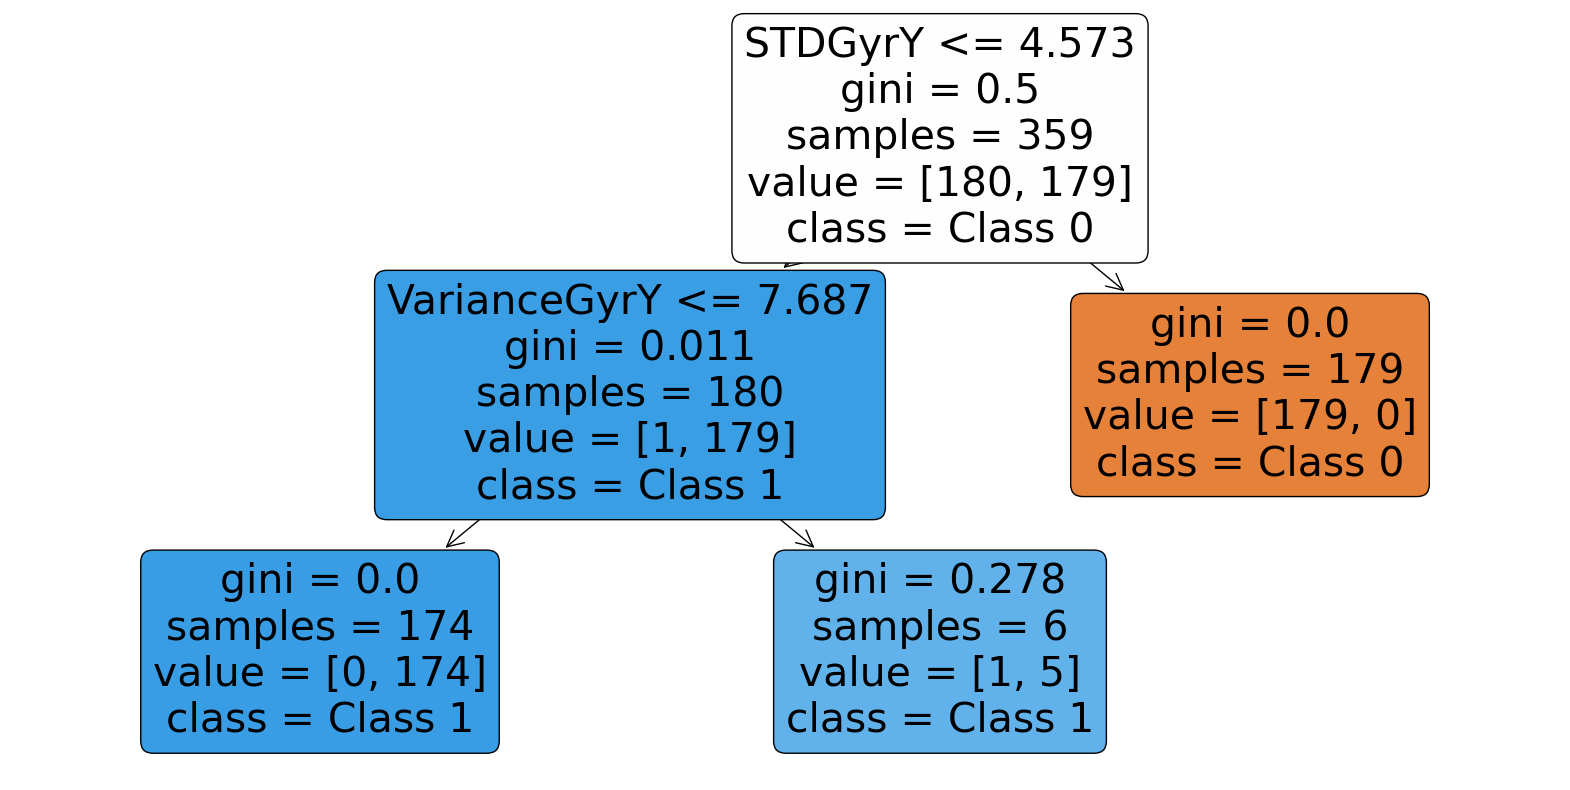

In [20]:
# Plot the tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, 
               filled=True, 
               rounded=True, 
               class_names=['Class 0', 'Class 1'],
               feature_names=X.columns)
plt.show()

The decision tree is really small and doesn't take into consideration a lot of variables

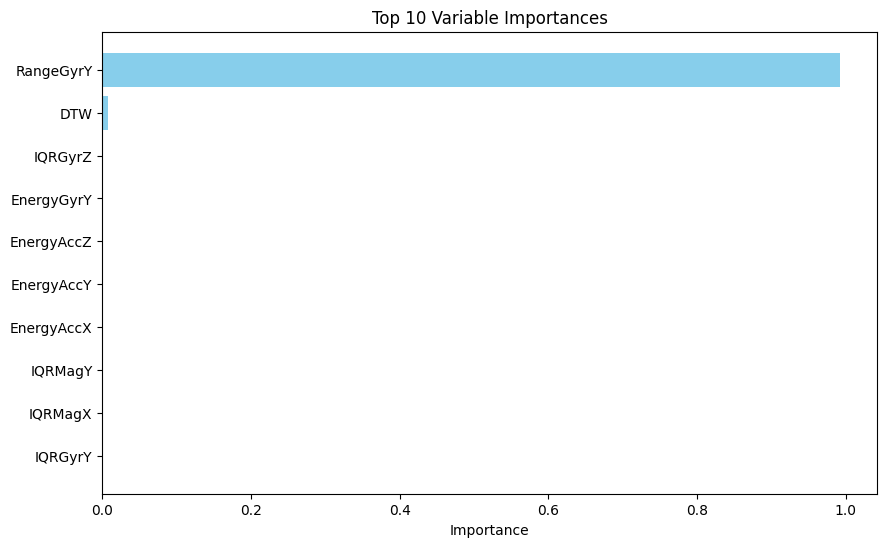

In [7]:
# Get feature importances
importance = model.feature_importances_

# Summarize feature importances
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(10), importance_df['Importance'].head(10), color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Variable Importances')
plt.gca().invert_yaxis()  
plt.show()

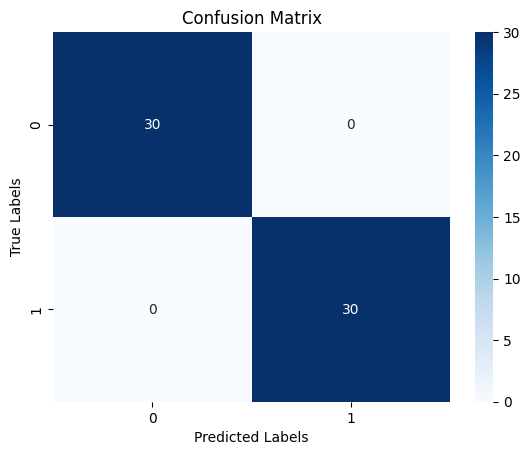

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Confusion matrix is perfect, this may be a problem regarding overfitting

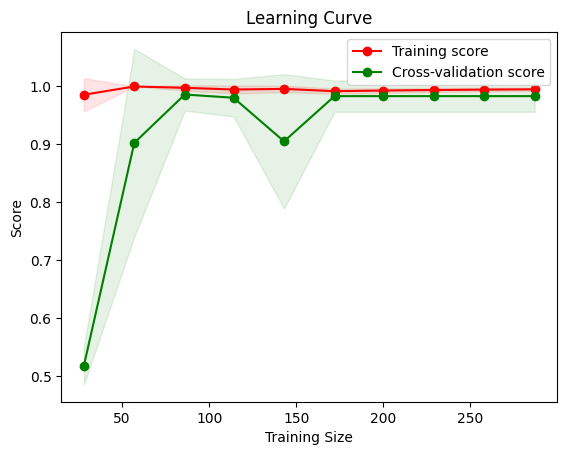

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()

In the end the gap narrows so overfitting may not be a problem. The training score is not exactly one but it decrease from the start slightly, this means that it's training to generalize and doesn't fit all the data points. Regarding the CV score, it start with small value because initially it overfit, having a small amount of data, but it gets better and adding more data doesn't improve model performance.
The shaded area indicates the standard deviation, bigger shades, higher variability. It stabilize over time, significatly after the plateau 

Test on the old man

In [30]:
test_data = pd.read_excel('AF3_A016.xlsx')

print("Test data shape:", test_data.shape)

# Separate the features and target in the test data
X_test = test_data.iloc[:, :-1].values  # All columns except the last one
y_test = test_data.iloc[:, -1].values   # The last column is the target

# Verify the shapes of X_test and y_test
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Predict the target for the test data using the trained model
y_pred = model.predict(X_test)

# Evaluate the model's performance on the test data
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.2f}')



Test data shape: (9, 68)
X_test shape: (9, 67)
y_test shape: (9,)
Accuracy: 1.00


c:\Users\emanu\Downloads\Gianfranco\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


c:\Users\emanu\Downloads\Gianfranco\.venv\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


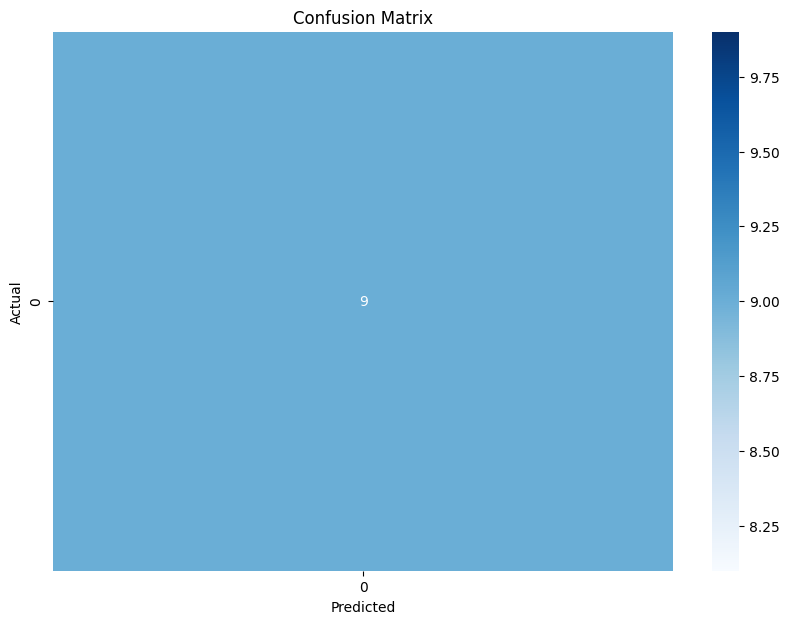

In [31]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [32]:
from sklearn.metrics import confusion_matrix, classification_report
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



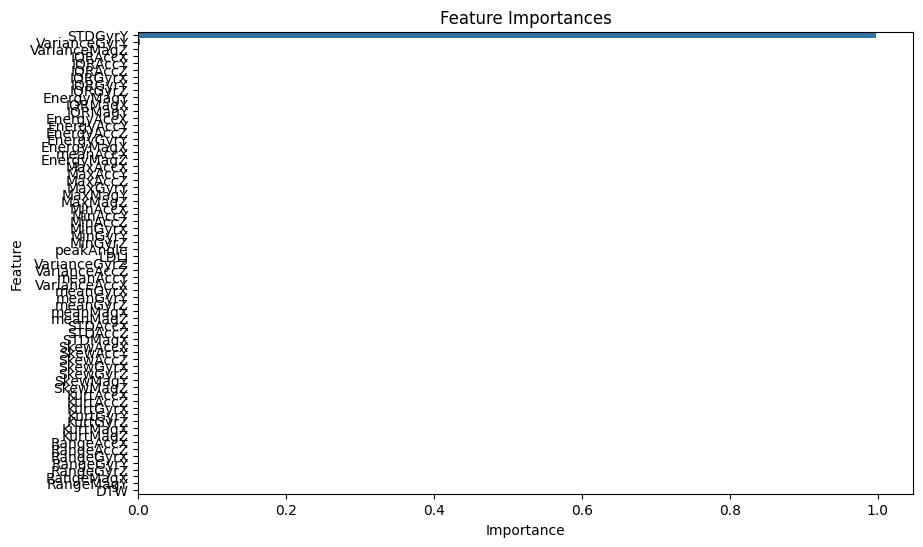

In [33]:
# Feature Importance
feature_importances = model.feature_importances_
features = test_data.columns[:-1]
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()


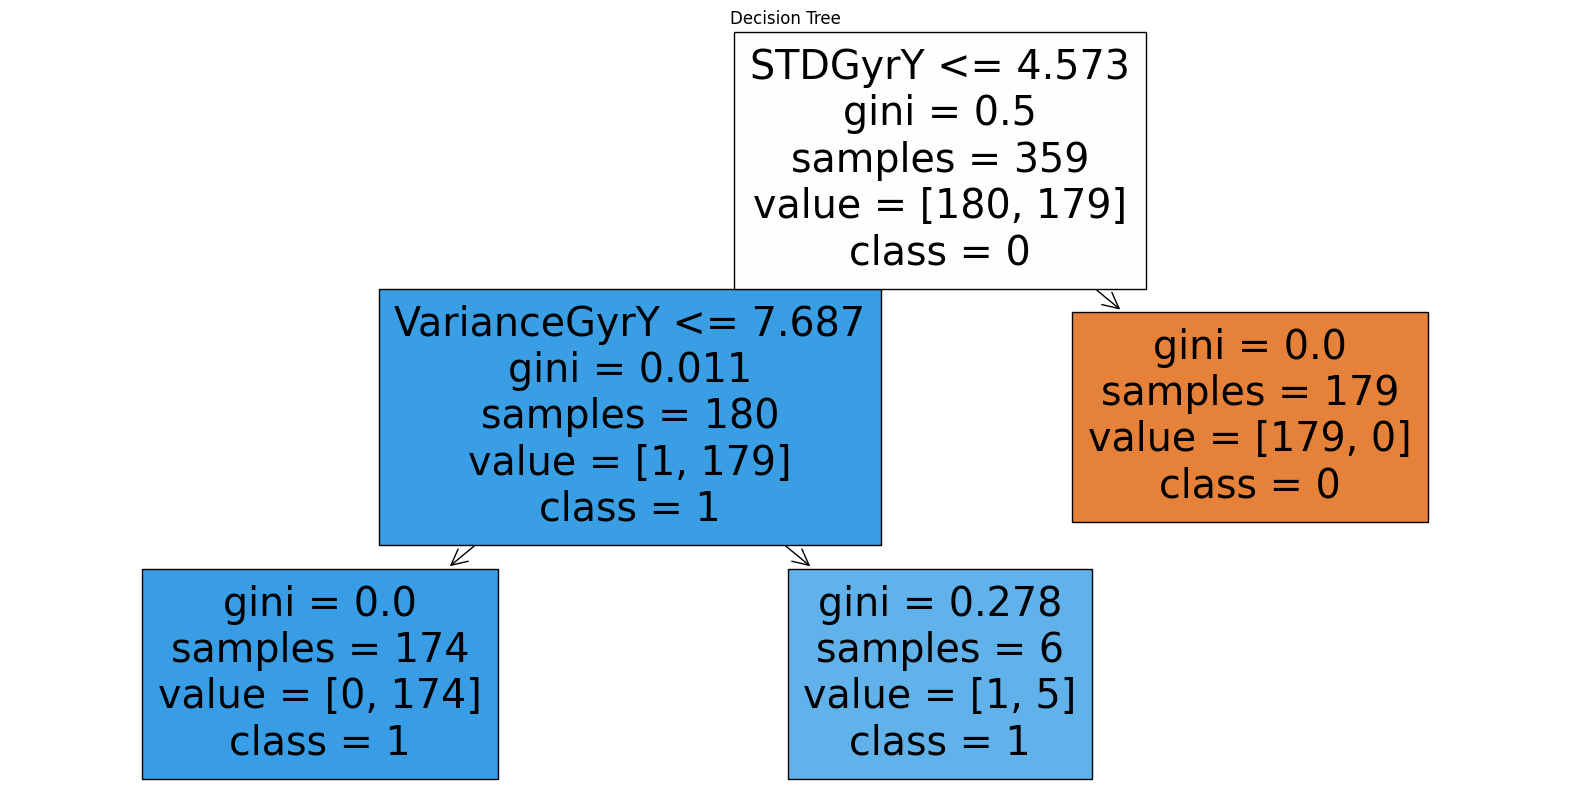

In [35]:
# Plot the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=features, class_names=np.unique(y).astype(str))
plt.title('Decision Tree')
plt.show()

In [36]:
def get_decision_path(model, sample):
    n_nodes = model.tree_.node_count
    children_left = model.tree_.children_left
    children_right = model.tree_.children_right
    feature = model.tree_.feature
    threshold = model.tree_.threshold

    node_indicator = model.decision_path([sample])
    leaf_id = model.apply([sample])
    
    sample_id = 0  # Since we are only dealing with one sample
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:node_indicator.indptr[sample_id + 1]]

    decision_path = []
    for node_id in node_index:
        if leaf_id[sample_id] == node_id:
            decision_path.append(f"Leaf node {node_id} reached, no further splits.")
        else:
            if sample[feature[node_id]] <= threshold[node_id]:
                threshold_sign = "<="
            else:
                threshold_sign = ">"
            decision_path.append(f"Decision node {node_id}: (X_test[{feature[node_id]}] = {sample[feature[node_id]]}) {threshold_sign} {threshold[node_id]}")
    
    return decision_path

# Get decision paths for all test samples
for i, sample in enumerate(X_test):
    print(f"Decision path for test sample {i}:")
    decision_path = get_decision_path(model, sample)
    for decision in decision_path:
        print(decision)
    print(f"Predicted class: {y_pred[i]}, Actual class: {y_test[i]}")
    print("\n")


Decision path for test sample 0:
Decision node 0: (X_test[9] = 7.53899426936926) > 4.572629928588867
Leaf node 4 reached, no further splits.
Predicted class: 0, Actual class: 0


Decision path for test sample 1:
Decision node 0: (X_test[9] = 4.90780703539309) > 4.572629928588867
Leaf node 4 reached, no further splits.
Predicted class: 0, Actual class: 0


Decision path for test sample 2:
Decision node 0: (X_test[9] = 8.20992246787721) > 4.572629928588867
Leaf node 4 reached, no further splits.
Predicted class: 0, Actual class: 0


Decision path for test sample 3:
Decision node 0: (X_test[9] = 7.74833786656964) > 4.572629928588867
Leaf node 4 reached, no further splits.
Predicted class: 0, Actual class: 0


Decision path for test sample 4:
Decision node 0: (X_test[9] = 10.2683974449977) > 4.572629928588867
Leaf node 4 reached, no further splits.
Predicted class: 0, Actual class: 0


Decision path for test sample 5:
Decision node 0: (X_test[9] = 8.26917475826804) > 4.572629928588867
Leaf

c:\Users\emanu\Downloads\Gianfranco\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\emanu\Downloads\Gianfranco\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\emanu\Downloads\Gianfranco\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\emanu\Downloads\Gianfranco\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\emanu\Downloads\Gianfranco\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with featur